# Обработка изображений

## Библиотека PIL

Подключим библиотеку, откроем изображение и отобразим его

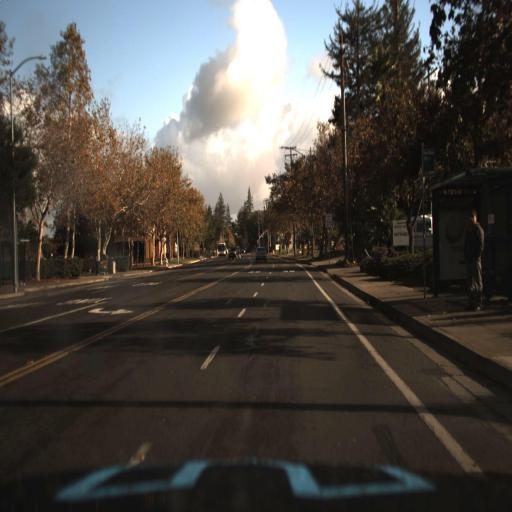

In [54]:
from pathlib import Path
from PIL import Image

DATA_DIR = Path() / "test_images"

image = Image.open(DATA_DIR / "img1.jpg")
image

Разделим изображение на 3 части (по цветовым каналам)

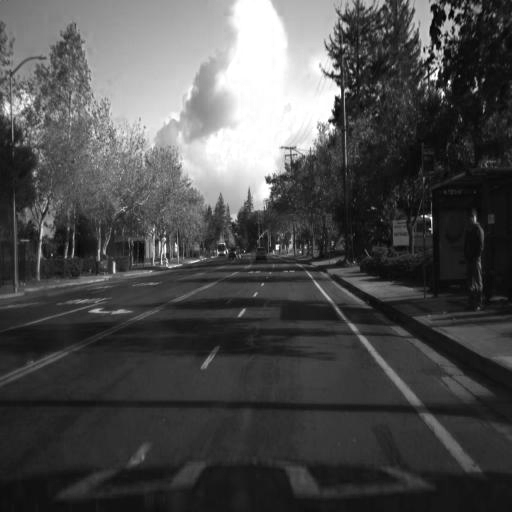

In [55]:
r, g, b = image.split()
r # красный канал

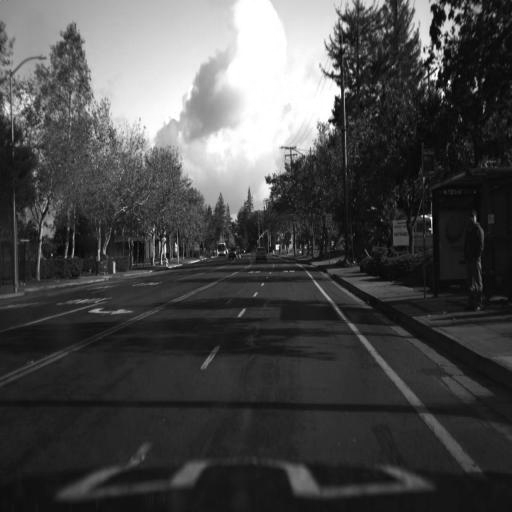

In [56]:
g # зеленый канал

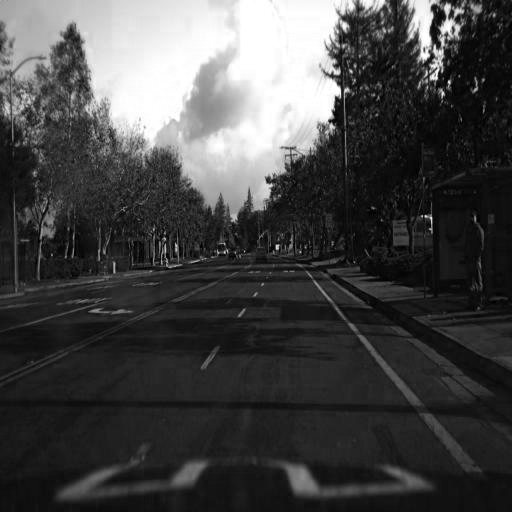

In [57]:
b # синий канал

Считаем гистограмму цветов (т.е. сколько пикселей каждого значения присутствует в изображении)

In [58]:
histogram = image.histogram()
len(histogram) # 768 = 3* 256 элементов

768

Узнать информацию об изображении, если она есть, можно командой _getexif()

In [59]:
exif = image._getexif()
exif

Можно обрезать изображение командой crop() (передаем x1,y1,x2,y2)
Сохранить изображение можно командой save()

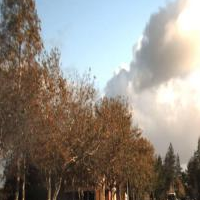

In [60]:
cropped = image.crop((50,50,250,250))
cropped.save(DATA_DIR / "img1_crop.png")
cropped

Для быстрого получения координат можно использовать Gimp или Photoshop

Поворот изображения можно сделать командой rotate() 

Выполнять все действия с изображениями лучше только если они открыты. Для проверки результата команды открытия нужно использовать блок:

In [61]:
try:
    ...
except ...:
    ...

Если вдруг произошла ошибка, то вернется ошибка IOError(ошибка ввода-вывода из моделя sys), и произойдет то, что мы пропишем, и корректно программа завершиться

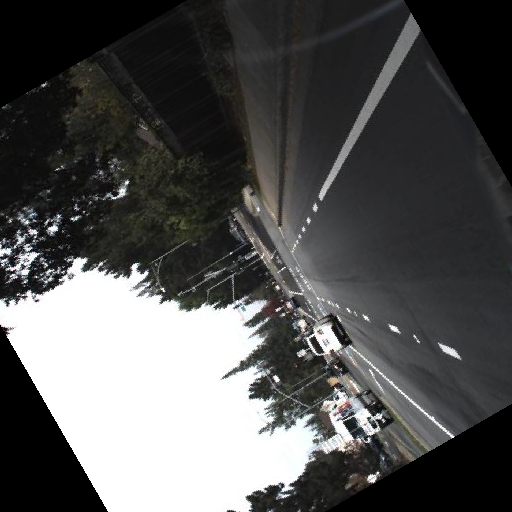

In [62]:
import sys 

try:
    image = Image.open(DATA_DIR / "img2.jpg")
except IOError:
    print("Unable to load image")
    sys.exit(1)

rotated = image.rotate(120)
rotated.save(DATA_DIR / "img2_rotated.jpg")
rotated

## Рисование в Pillow

Модуль ImageDraw имеет базовые возможности для создания 2D графики

Модуль new() создает новое изображение с режимом "RGBA", размер 200х200 и белый фон
С помощью метода rectangle() на изображении нарисуем синий прямоугольник указав координаты его углов и цвет, а с помощью метода ellipse() добавим желтый эллипс, указав координаты углов прямоугольника, в который он вписан и цвет

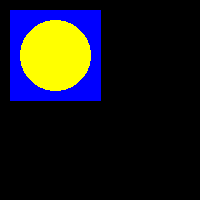

In [63]:
from PIL import ImageDraw

imageDraw = Image.new("RGBA",(200,200),"black")
idraw = ImageDraw.Draw(imageDraw)

idraw.rectangle((10,10,100,100),fill="blue")
idraw.ellipse((20,20,90,90),fill="yellow")

imageDraw

С помощью метода text() можно добавить текст на изображение

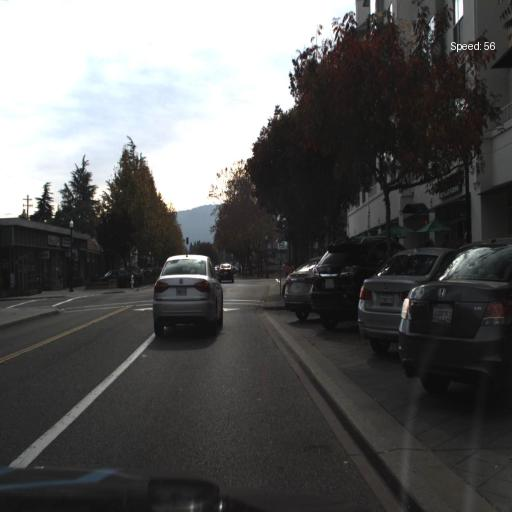

In [64]:
try:
    image = Image.open(DATA_DIR / "img3.jpg")
except IOError:
    print("Unable to load image")
    sys.exit(1)

idraw = ImageDraw.Draw(image)
text = "Speed: 56"

idraw.text((450, 40), text)

image